In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload

import sys
sys.path.append("..")

### Load data

In [2]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
IMAGE_SIZE = 28
NUM_PIXELS = IMAGE_SIZE * IMAGE_SIZE
NUM_CLASSES = 10

50373-th digit:


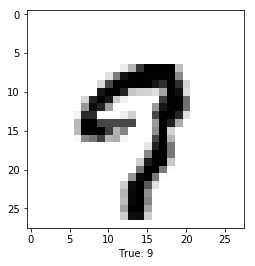

In [4]:
def plot_random():
    i = np.random.randint(X_train.shape[0])
    print("{0}-th digit:".format(i))
    plt.imshow(X_train[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='binary')
    plt.xlabel("True: {0}".format(y_train[i]))
    plt.show()
    
plot_random()

In [5]:
X_train = X_train[:10000]
X_test = X_test[:1000]

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_train = X_train / 255.
X_test = X_test / 255.

X_train.shape, X_test.shape

((10000, 784), (1000, 784))

In [6]:
from sklearn.preprocessing import OneHotEncoder

y_train = y_train[:10000]
y_test = y_test[:1000]

ohe = OneHotEncoder(categories=[range(10)])
Y_train = ohe.fit_transform(y_train.reshape(-1, 1)).toarray()
Y_test = ohe.fit_transform(y_test.reshape(-1, 1)).toarray()

Y_train.shape

(10000, 10)

### Fit model

In [7]:
%autoreload

from src.model import DNN
from src.utils.layers.dense import Dense
from src.utils.layers.activation import Activation
from src.utils import activation_fns
from src.utils.optimizers import Adam

dnn = DNN()

dnn.add(Dense(20))
dnn.add(Activation(activation_fns.ReLU))
dnn.add(Dense(10))
dnn.add(Activation(activation_fns.ReLU))
dnn.add(Dense(NUM_CLASSES))
dnn.add(Activation(activation_fns.softmax))

dnn.configure(X_train.shape, Adam(0.001))

In [8]:
costs = dnn.fit(X_train, Y_train, 10, batch_size=32)

### Accuracy

In [9]:
from sklearn.metrics import accuracy_score
decode = lambda x: np.argmax(x, axis=1)

y_train_pred = decode(dnn.predict(X_train))
print("Train:", accuracy_score(y_train, y_train_pred))
y_test_pred = decode(dnn.predict(X_test))
print("Test:", accuracy_score(y_test, y_test_pred))

Train: 0.9674
Test: 0.917


In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[ 83,   0,   0,   0,   0,   0,   1,   0,   0,   1],
       [  0, 123,   1,   1,   0,   0,   0,   0,   1,   0],
       [  1,   1, 102,   1,   1,   0,   0,   4,   5,   1],
       [  0,   0,   1,  99,   0,   4,   1,   1,   0,   1],
       [  0,   1,   0,   0, 101,   0,   1,   0,   1,   6],
       [  1,   0,   0,   3,   0,  79,   2,   0,   1,   1],
       [  3,   0,   1,   0,   0,   3,  80,   0,   0,   0],
       [  0,   2,   3,   1,   0,   0,   0,  91,   0,   2],
       [  1,   0,   2,   4,   0,   4,   0,   1,  74,   3],
       [  0,   1,   0,   0,   3,   0,   0,   3,   2,  85]])

241-th digit:


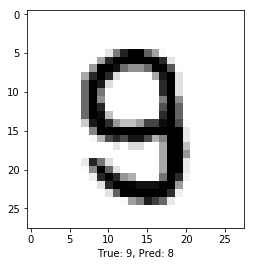

In [11]:
def plot_random_false():
    i = np.random.choice(np.where(y_test != y_test_pred)[0])
    print("{0}-th digit:".format(i))
    plt.imshow(X_test[i].reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='binary')
    plt.xlabel("True: {0}, Pred: {1}".format(y_test[i], y_test_pred[i]))
    plt.show()
    
plot_random_false()

### Cost

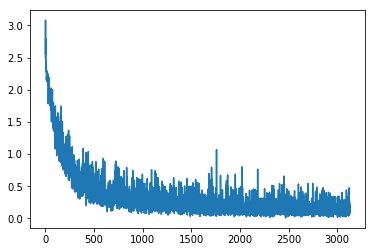

In [12]:
plt.plot(costs)
plt.show()

In [13]:
print("mean:   {0}".format(np.mean(costs)))
print("std:    {0}".format(np.std(costs)))
print("min:    {0}".format(np.min(costs)))
print("max:    {0}".format(np.max(costs)))
print("argmin: {0}".format(np.argmin(costs)))
print("argmax: {0}".format(np.argmax(costs)))

mean:   0.3554806496732217
std:    0.38943331440150414
min:    0.008757822050921163
max:    3.079711447123745
argmin: 2469
argmax: 1
